In [6]:
%load_ext autoreload
%autoreload 2

import sys

import jax
import jax.numpy as jnp

sys.path.append('../../')
from ics import get_delta
from main import get_forward_model
from plot_utils import plot_cubes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
N, L, Z_I, Z_F = 128, 120, 99, 0

SEED_INT = 1
key = jax.random.PRNGKey(SEED_INT)
input_arr = jax.random.normal(key, shape=(N**3,))

BIAS_PARAMS = {"ALPHA": 1.5}
argdic = {
    "N": N,
    "L": L,
    "Z_I": Z_I,
    "Z_F": Z_F,
    "LPT_METHOD": "LPT1",
    "PM_METHOD": "CIC",
    "INPUT_ARG": "U",
    'BIAS_MODEL': 'POWER_LAW', 
    'BIAS_PARAMS': BIAS_PARAMS,
    'N_TR': 1e6, 
    'SAMPLE': 2
}

forward_model = get_forward_model(argdic)
n_tr = forward_model(input_arr)

(<Figure size 500x500 with 1 Axes>, <Axes: >)

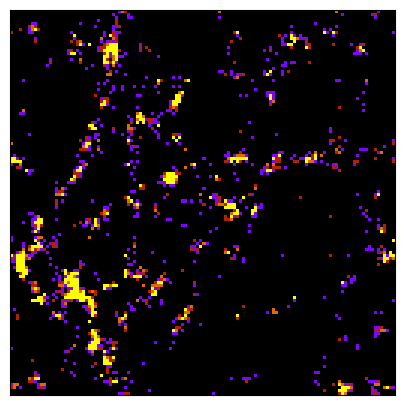

In [23]:
plot_cubes(n_tr, cmap='gnuplot', vlim=(1, 5))